In [1]:
import numpy as np
import astropy.io.fits
from astropy.table import Table
import matplotlib.pyplot as plt
import scipy as sym 
import scipy.integrate as integrate
from scipy import log,exp,sqrt,stats
from astropy import units as u
import astropy.constants as const
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.stats import biweight_location, biweight_scale, bootstrap
from astropy.cosmology import LambdaCDM
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord
import scipy.stats as stats
from astropy.stats import sigma_clip
cosmos = LambdaCDM(H0=67.77* u.km / u.Mpc / u.s, Om0=0.307115, Ode0=0.692885)  # define cosmology
c=const.c.to("km/s").value
%matplotlib inline


In [2]:
path_2_data = 'massive_cluster0.fit'
path_2_data = 'massive_cluster4.fit'
path_2_data = 'massive_cluster3.fit'
path_2_data = 'massive_cluster2.fit'
path_2_data = 'massive_cluster1.fit'
#print('opening', path_2_data)
my_file=astropy.io.fits.open(path_2_data)
#print(my_file[1].data.columns)
data = my_file[1].data

In [3]:
ra=data.field('ra')
dec=data.field('dec')
# Redshift at the center of the cluster
zspec=data.field('zspec')
z0=data.field('zspec')
mask0=np.where(z0>0)
z_gal=(zspec[mask0])
len(z_gal)

224

In [4]:
data.field('zspec')[mask0].min()


0.3185

(array([  1.,   3.,   2.,  10., 200.,   2.,   3.,   0.,   2.,   1.]),
 array([0.3185    , 0.37      , 0.42150003, 0.47300002, 0.5245    ,
        0.57600003, 0.6275    , 0.679     , 0.73050004, 0.782     ,
        0.8335    ], dtype=float32),
 <BarContainer object of 10 artists>)

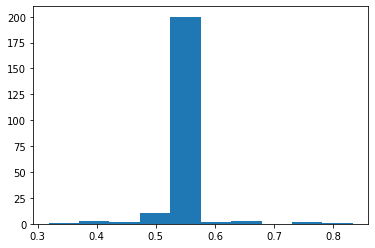

In [5]:
plt.hist(z_gal)

In [6]:
from astropy.stats import jackknife_stats

In [7]:
test_statistic = np.mean

In [8]:
jackknife_stats(z_gal, test_statistic, 0.95)

(0.5440306570380926,
 -2.076849341392517e-06,
 0.0027833412620890258,
 array([0.53857541, 0.54948591]))

In [9]:
test_statistic = lambda x: (np.mean(x), np.var(x))
estimate, bias, stderr, conf_interval = jackknife_stats(
    z_gal, test_statistic, 0.95)
estimate, bias, stderr, conf_interval

(array([0.54403066, 0.0017353 ]),
 array([-2.07684932e-06, -7.72312744e-06]),
 array([0.00278334, 0.00054845]),
 array([[0.53857541, 0.00066037],
        [0.54948591, 0.00281023]]))

In [10]:
clipped_redshift=sigma_clip(z_gal, sigma=2.7, maxiters=10000)

import numpy.ma as ma
zz=[]
zk=[]
for x in range(len(clipped_redshift)):
    if ma.is_masked(clipped_redshift[x])==False:
        zz.append(clipped_redshift[x])
        
    if not ma.is_masked(clipped_redshift[x])==False:
        zk.append(clipped_redshift[x])
        
    else:
        continue

In [11]:
z_halo=np.array(zz)
mask1=np.where(z_halo)
z_halo.max(),z_halo.min()

(0.5648, 0.525)

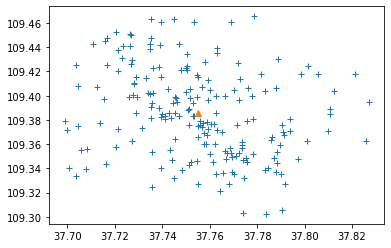

In [12]:
ra_gal=ra[mask0][mask1]
dec_gal=dec[mask0][mask1]
ra_cl=np.mean(ra_gal)
dec_cl=np.mean(dec_gal)
plt.plot(dec_gal,ra_gal,linestyle='none',marker='+')
plt.plot(dec_cl,ra_cl,linestyle='none',marker='^')

In [13]:
len(z_halo),len(ra_gal),len(dec_gal)

(198, 198, 198)

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 2.,
        1., 1., 1., 1., 2., 0., 3., 4., 1., 3., 1., 2., 2., 2., 5., 3., 3.,
        5., 4., 6., 2., 4., 5., 4., 2., 4., 7., 8., 3., 1., 6., 5., 3., 6.,
        4., 4., 3., 2., 3., 3., 1., 2., 2., 1., 2., 7., 5., 2., 3., 3., 3.,
        0., 5., 2., 1., 0., 0., 1., 1., 0., 1., 2., 3., 2., 0., 0., 1., 0.,
        2., 1., 1., 0., 0., 0., 2., 1., 1., 2., 0., 1., 0., 0., 2.]),
 array([0.525     , 0.52539796, 0.525796  , 0.526194  , 0.52659196,
        0.52699   , 0.527388  , 0.52778596, 0.528184  , 0.528582  ,
        0.52897996, 0.529378  , 0.529776  , 0.53017396, 0.530572  ,
        0.53097   , 0.53136796, 0.531766  , 0.532164  , 0.53256196,
        0.53296   , 0.533358  , 0.53375596, 0.534154  , 0.534552  ,
        0.53495   , 0.535348  , 0.535746  , 0.536144  , 0.536542  ,
        0.53694   , 0.537338  , 0.537736  , 0.538134  , 0.538532  ,
        0.53893   , 0.539328  , 0.539726  , 0.540124  , 0.540522  ,
      

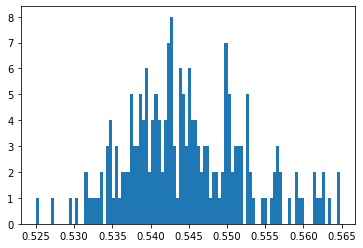

In [14]:
plt.hist(z_halo,bins=100)


In [15]:
z_cl=np.mean(z_halo)
z_cl

0.5447409

In [16]:
# From astropy inbuilt module separation
coordinates_SubHaloes = SkyCoord( ra_gal , dec_gal , unit='deg', frame='icrs')
coordinate_cluster    = SkyCoord( ra_cl , dec_cl, unit='deg', frame='icrs') 
Angular_separation_Astropy = coordinates_SubHaloes.separation( coordinate_cluster )
Angular_separation_Astropy_radian = (Angular_separation_Astropy).to(u.radian)
Angular_separation_Astropy_radian.value

# Comoving distance
D = cosmos.comoving_distance(z_cl) 
print('the cluster at redshift ',z_cl,' is at dC=',D)
# Angular diameter distance
print('Angular diameter distance at the clusters redshift :' , cosmos.angular_diameter_distance(z_cl), 'per radian')
print('Angular diameter dist*u.degreeance at the clusters redshift :' , cosmos.angular_diameter_distance(z_cl)/(180/np.pi), 'per degree')
print('Angular diameter distance at the clusters redshift :' , (cosmos.angular_diameter_distance(z_cl)/(180/np.pi)).to(u.kpc)/60, 'per arc minute    ')

#
# The angular separation between sub haloes and the cluster converted in Mpc
r_proj =  Angular_separation_Astropy_radian * cosmos.angular_diameter_distance(z_cl)/u.radian  # where D is comoving distance
print('min, max projected distance : ',r_proj.min(), r_proj.max()) #'compared to the 3D virial radius', r_cl/1000)

the cluster at redshift  0.5447409  is at dC= 2094.481800857466 Mpc
Angular diameter distance at the clusters redshift : 1355.879021598122 Mpc per radian
Angular diameter dist*u.degreeance at the clusters redshift : 23.66455318560654 Mpc per degree
Angular diameter distance at the clusters redshift : 394.409219760109 kpc per arc minute    
min, max projected distance :  0.060335805032915 Mpc 1.734803648802138 Mpc


In [17]:
N_subhaloes=len(r_proj)
def get_bins(r_proj, N_per_bin=10):
    dR=0.0001
    
    #choosing the bins
    r_bins_fine = np.arange(0., 2.5, dR)
    
    # Projected distance
    N_2D_fine, bins_2D_fine = np.histogram(np.array(r_proj), bins = r_bins_fine)
    R_2D_fine = (bins_2D_fine[1:] + bins_2D_fine[:-1])/2.

    #rint( np.cumsum( N_2D_fine) )
    itp_bins = interp1d(np.cumsum( N_2D_fine), R_2D_fine )
    
    #rint(itp_bins(np.arange(N_per_bin, N_subhaloes, N_per_bin)))
    bins_2D = np.hstack((0., itp_bins(np.arange(N_per_bin, N_subhaloes, N_per_bin)), 2.5 ))
    #rint(bins_2D)
    
    return bins_2D
    # Three D distance
    #N_3D, bins_3D = np.histogram(np.array(distances[mask]), bins = r_bins)


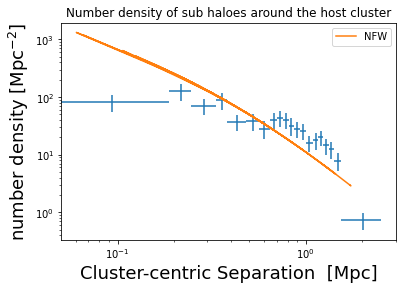

In [18]:
bins_2D = get_bins(r_proj, N_per_bin=10)
# Projected distance
N_2D, bins_2D = np.histogram(np.array(r_proj), bins = bins_2D)

#Getting the number density profile in 2D 
R_2D = (bins_2D[1:] + bins_2D[:-1])/2.
n_2D = N_2D /(np.pi*( ( bins_2D[1:]**2 - bins_2D[:-1]**2) ) )
dR_2D = [ bins_2D[1:] - R_2D, R_2D - bins_2D[:-1] ]
# central point of each separation 

from colossus.halo import profile_nfw

Rs=0.5#Rs = Rvir / c
rhos = 200

p_nfw = profile_nfw.NFWProfile(rhos , Rs)
rho_nfw = p_nfw.density(r_proj.value)

#plt.plot(R_2D, n_2D, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.errorbar(R_2D, n_2D, yerr=n_2D*N_2D**-0.5, xerr=dR_2D, ls='')
plt.plot(r_proj, 1*rho_nfw , label = 'NFW');
plt.yscale('log')
plt.xscale('log')
plt.title('Number density of sub haloes around the host cluster')
plt.xlabel('Cluster-centric Separation  [Mpc]',fontsize=18)
plt.ylabel(r'number density [Mpc$^{-2}$]',fontsize=18) 
#plt.axvline(x=r_cl/1000.,linestyle='dashed',label = 'Rvir')
plt.legend(loc=1, numpoints=1)
plt.show()

In [19]:
n_2D

array([ 81.35710742, 126.41106433,  70.87906395,  88.37866045,
        37.06087041,  38.21075575,  28.37578302,  39.57591628,
        43.97959098,  40.27081773,  32.08404619,  27.92876974,
        25.89780981,  16.00800135,  17.97230252,  20.02764504,
        14.43980016,  12.50753498,   7.88188272,   0.73739412])

/tmp/ipykernel_27984/783038065.py:26: RuntimeWarning: divide by zero encountered in power
  plt.errorbar(R_proj, n, yerr=n*N_2D**-0.5, xerr=dR/2, ls='')
/tmp/ipykernel_27984/783038065.py:26: RuntimeWarning: invalid value encountered in multiply
  plt.errorbar(R_proj, n, yerr=n*N_2D**-0.5, xerr=dR/2, ls='')


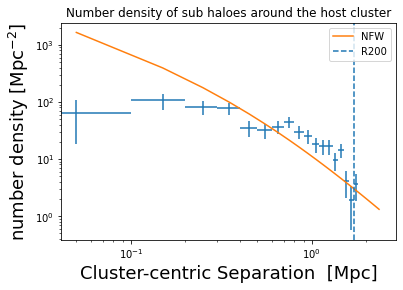

In [20]:
# create histogram of distances in Mpc

dR = 0.1
r_bins = np.arange(0., 2.5, dR)
# Projected distance
N_2D, bins_2D = np.histogram(np.array(r_proj), bins = r_bins)
# Three D distance
#N_3D, bins_3D = np.histogram(np.array(distances), bins = r_bins)

#Getting the number density profile in 2D 
n = N_2D /(np.pi*( ( bins_2D[1:]**2 - bins_2D[:-1]**2) ) )

# central point of each separation 
R_proj = (bins_2D[1:] + bins_2D[:-1])/2.

#NFW

from colossus.halo import profile_nfw

Rs=0.5#Rs = Rvir / c
rhos =200

p_nfw = profile_nfw.NFWProfile(rhos , Rs)
rho_nfw = p_nfw.density(R_proj)
#plt.plot(R_2D, n_2D, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.errorbar(R_proj, n, yerr=n*N_2D**-0.5, xerr=dR/2, ls='')
plt.plot(R_proj, 1*rho_nfw , label = 'NFW');
plt.yscale('log')
plt.xscale('log')
plt.title('Number density of sub haloes around the host cluster')
plt.xlabel('Cluster-centric Separation  [Mpc]',fontsize=18)
plt.ylabel(r'number density [Mpc$^{-2}$]',fontsize=18) 
plt.axvline(x=1.70,linestyle='dashed',label = 'R200')
plt.legend(loc=1, numpoints=1)

In [21]:
len(n)

24

In [22]:
# Peculiar velocities of a members from there spectrosocpic redshift
los_v= c*(z_halo - z_cl)/(1 + z_cl)
los_v.max(), los_v.min()

(3892.931, -3831.1829)

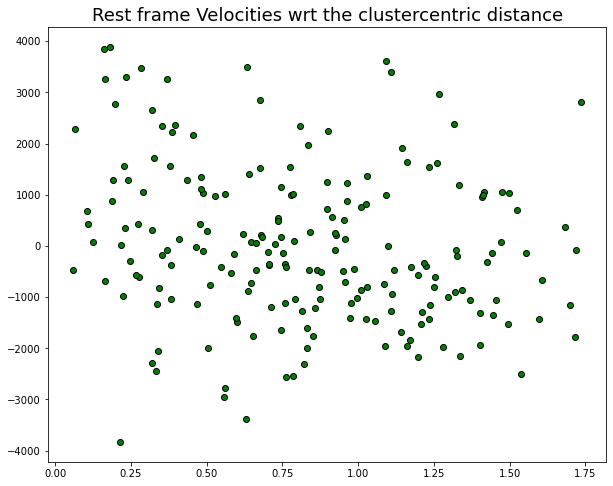

In [23]:
# Peculiar velocities of a members from there spectrosocpic
# redshift and mean redshift of a cluster
plt.figure(figsize=(10,8))

plt.title('Rest frame Velocities wrt the clustercentric distance',fontsize=18)
plt.plot(r_proj,los_v, color='black', linestyle='none', linewidth = 2, marker='.', markerfacecolor='green', markersize=12)


# Getting a profile

In [24]:
# creating bins
r_bins = np.linspace(r_proj.min().value, r_proj.max().value,11)
rbin_midpoints = (r_bins[1:] + r_bins[:-1])/2

In [25]:
si=np.searchsorted(r_proj.value,r_bins)
#np.split(si,los_v)#[1:]

In [26]:
si=np.searchsorted(r_proj.value,r_bins)
np.split(r_proj.value,si)[1:]

[array([0.16319271, 0.12366722, 0.160579  , 0.18193746, 0.21635592,
        0.23230501, 0.06033581, 0.18766274, 0.06490673, 0.19694209,
        0.22446678]),
 array([0.27416109, 0.32585536, 0.1063027 , 0.10775224, 0.21325011,
        0.31932467, 0.16409246, 0.38182655, 0.35177257, 0.22894847,
        0.19047405, 0.37056685, 0.43426804, 0.24002731, 0.22581404,
        0.31952359, 0.24575475, 0.2772208 , 0.38091206, 0.26615173,
        0.28303526, 0.50486416, 0.2891997 ]),
 array([0.45362414, 0.48646832, 0.48843238, 0.33798067, 0.51147608,
        0.33133751, 0.3804056 , 0.32033159, 0.33720823, 0.35394047,
        0.34221099, 0.36920031, 0.56121872, 0.46527342, 0.38506378,
        0.40895505, 0.50251356, 0.39409056]),
 array([0.63151234, 0.63483039, 0.6449552 , 0.66324314, 0.46886316,
        0.60143677, 0.64755878, 0.67850927, 0.52722726, 0.48073665,
        0.47651966, 0.70285085, 0.48130524, 0.70616629, 0.63841334,
        0.63533054, 0.55772863]),
 array([0.74531219, 0.7591801 , 0.76

In [27]:
[(len(i)) for i in np.split(los_v,si)[1:]]

[11, 23, 18, 17, 58, 2, 17, 30, 18, 4, 0]

In [28]:
len(los_v)

198

In [29]:
#Velocity profile of the cluster by biniing the system.

dd=[np.sum(x)/len(x) for x in np.split(np.sqrt(los_v**2),si)[1:]]
dd

/tmp/ipykernel_27984/3199086987.py:3: RuntimeWarning: invalid value encountered in true_divide
  dd=[np.sum(x)/len(x) for x in np.split(np.sqrt(los_v**2),si)[1:]]


[1978.0209517045455,
 1138.9317255434783,
 1443.8844401041667,
 1212.8504136029412,
 1014.0767780172414,
 999.4739379882812,
 1263.3949908088234,
 1268.532421875,
 937.4302300347222,
 1591.3963623046875,
 nan]

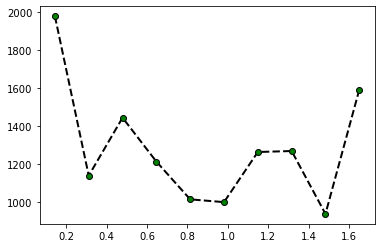

In [30]:
plt.plot(rbin_midpoints,dd[:-1],color='black', linestyle='dashed', linewidth = 2, marker='.', markerfacecolor='green', markersize=12)

In [31]:
n

array([ 63.66197724, 106.10329539,  82.76057041,  77.3038295 ,
        35.36776513,  31.83098862,  36.72806379,  44.56338407,
        29.95857752,  25.12972786,  18.18913635,  16.60747232,
        16.55211408,   9.43140404,  14.26906386,   4.10722434,
         1.92915083,   3.63782727,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

# Caustic Analysis

In [32]:
len(np.vstack((ra_gal,dec_gal,z_halo)).T)

198

In [33]:
cluster_data=np.vstack((ra_gal,dec_gal,z_halo)).T
len(cluster_data)

198

In [34]:
import causticpy
caustic= causticpy.Caustic()
caustic.run_caustic(cluster_data)


DATA SET SIZE 190
Pre_r200= 1.8806436810949194
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1398.5471289306813
Combined Vdisp= 1398.5471289306813
Calculating initial surface
complete


1

In [35]:
caustic.r
caustic.v

array([ 3254.7408583 ,    69.73311226,  3856.77928817,  3895.62719855,
          11.47282235,  3293.57719302,  -474.04502771,   885.41189787,
        2283.70515817,  2769.22300823,  -978.98683297,   419.30642733,
        1720.50306301,   691.20707297,   419.30642733, -3833.83364347,
        2652.69085277,  -687.6738078 , -1037.24712287,  -182.73200254,
         341.6337579 ,  1293.24550285,   -85.62380227,  1293.24550285,
        1293.24550285,  1565.13457283,   302.78584752,  -299.25258235,
        -609.98956271,  -376.93682744,  -571.14165233,  3487.78201791,
       -1988.85886782,  1060.19276758,  2167.1730027 ,  -105.04775745,
        1040.78038805, -2047.11915772,  -765.35805289, -2435.54038317,
        1565.13457283, -2280.17189299, -1134.34374749,  2341.96544807,
        -823.61834279,  3254.7408583 ,  1021.35643286,   -27.36351236,
        2225.44486826,   128.00497782,   283.36189234,  2361.38940326,
       -3387.15212811,  3507.2059731 ,    69.73311226,  -474.04502771,
      

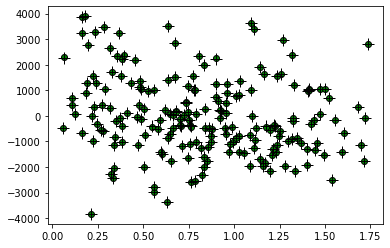

In [36]:
plt.plot(caustic.r,caustic.v,color='black', linestyle='none', linewidth = 2, marker='.', markerfacecolor='green', markersize=12)
plt.plot(r_proj,los_v,color='black', linestyle='none', linewidth = 2, marker='+', markerfacecolor='red', markersize=12)


In [37]:
caustic.run_caustic(cluster_data,clus_ra=caustic.clus_ra,clus_dec=caustic.clus_dec,clus_z=caustic.clus_z)

DATA SET SIZE 190
Pre_r200= 1.8806436810949194
Calculating Density w/Mirrored Data
Vdisp from galaxies= 1398.5471289306813
Combined Vdisp= 1398.5471289306813
Calculating initial surface
complete
r200 estimate:  1.67760838587353
M200 estimate:  1832546548856437.2


1

In [38]:
caustic.r200_est

array(0.94784504)

In [39]:
caustic.run_caustic(cluster_data, r200=caustic.r200, gal_r=caustic.r,
                    gal_v=caustic.v, clus_z=caustic.clus_z,
                    clus_ra=caustic.clus_ra, clus_dec=caustic.clus_dec,
                    rlimit=3, vlimit=3500,
                    clus_vdisp=1313.2323719893309, xmax=3)

DATA SET SIZE 190
Pre_r200= 1.8806436810949194
Calculating Density w/Mirrored Data
Combined Vdisp= 1313.2323719893309
Calculating initial surface
complete
r200 estimate:  1.6337178990975214
M200 estimate:  1692577280906246.2


1

In [40]:
caustic.M200_est/ 1e15

1.618089942045506

In [41]:
caustic.ang_d

1355.8790129980925

In [42]:
caustic.angle
z_cl=caustic.clus_z
caustic.ang_d
caustic.lum_d
caustic.v
caustic.data_set.T # velocities of the galaxies after clipping
caustic.x_range
caustic.y_range
caustic.img_tot
caustic.caustic_profile
caustic.caustic_fit
caustic.gal_vdisp
caustic.memflag

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

<function matplotlib.pyplot.show(*, block=None)>

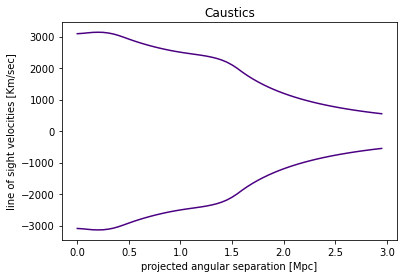

In [43]:
plt.title('Caustics')
caustic_profile=caustic.caustic_profile
caustic_radii=caustic.x_range
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')  # assumes caustic
plt.xlabel('projected angular separation [Mpc]')
plt.ylabel('line of sight velocities [Km/sec]')
plt.show

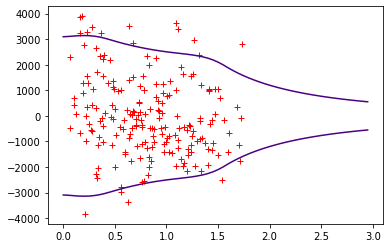

In [44]:
plt.plot(caustic.r,caustic.v,color='red', linestyle='none',marker='+')
plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo') 

In [45]:
caustic.clus_dec

37.7549378197718

In [46]:
projected_radius=np.array(caustic.r)
peculiar_velocity=np.array(los_v)
cluster_redshift=caustic.clus_z
cluster_RA=caustic.clus_ra
cluster_DEC=caustic.clus_dec

caustic_profile=caustic.caustic_profile

caustic_mask = np.array([x==1 for x in caustic.memflag])
cut_radius = np.transpose(caustic.data_set)[0]
cut_velocity = np.transpose(caustic.data_set)[1]
cut_RA = np.transpose(caustic.data_set)[2]
cut_DEC = np.transpose(caustic.data_set)[3]
cut_z = np.transpose(caustic.data_set)[4]

trimmed_radius = cut_radius[caustic_mask]
trimmed_velocity = cut_velocity[caustic_mask]

<function matplotlib.pyplot.show(*, block=None)>

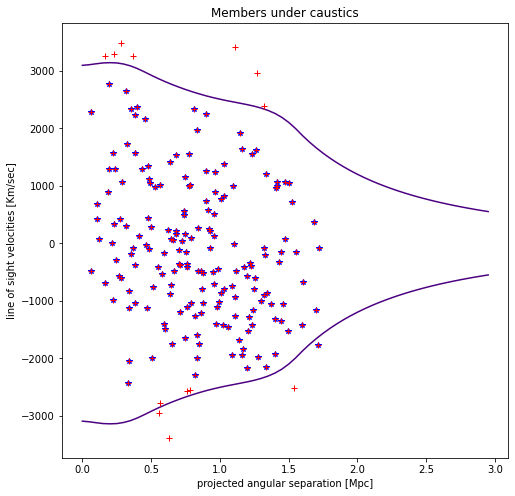

In [47]:
# plot the original and rejected data
plt.figure(figsize=(8,8))
plt.title('Members under caustics')

plt.plot(caustic_radii, caustic_profile, color='indigo')
plt.plot(caustic_radii, -1*caustic_profile, color='indigo')
plt.plot(trimmed_radius,trimmed_velocity,'*',color='blue',)
plt.plot(cut_radius,cut_velocity, '+', color='red', label="original data")
plt.xlabel('projected angular separation [Mpc]')
plt.ylabel('line of sight velocities [Km/sec]')
plt.show


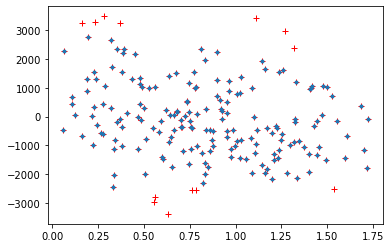

In [48]:
plt.plot(cut_radius, cut_velocity, '+', color='red')
plt.plot(trimmed_radius, trimmed_velocity, '.')


In [49]:
len(trimmed_velocity)

177

In [50]:
h0=67.77
class MassCalc:
    """
    MassCalc(self,ri,A,vdisp,r200=None,conc1=None,beta=None,fbr=None):

        ri - rgrid values

        A - caustic profile values

        vdisp - galaxy velocity dispersion

        r200 = 2.0 - critical radius of cluster. Default is 2.0, but advised to take the output r200 and rerun
        the analysis with this better estimate.

        conc1 = None - concentration of cluster. If None given then calculated from relationship

        beta = 0.2 - Anisotrpy parameter. Default value is 0.2, but a profile can be given that has same xvalues as ri.

        fbr = None - An exact guess of Fbeta by whatever means. Usually not used.

        H0 = 100.0 - Hubble constant
    """
    
    def __init__(self,ri,A,vdisp,clus_z,r200=None,conc1=None,beta=0.25,fbr=None,H0=h0):
        "Calculate the mass profile"
        G = 6.67E-11
        solmass = 1.98892e30
        self.crit = 2.7745946e11*(H0/100.0)**2.0*(0.25*(1+clus_z)**3.0 + 0.75)
        r2 = ri[ri>=0]
        A2 = A[ri>=0]
        kmMpc = 3.08568025e19
        sumtot = np.zeros(A2.size)
        #print 'Using beta = %.2f'%(beta)
        if conc1 == None:
            #self.conc = 4.0*(vdisp/700.0)**(-0.306)
            self.conc = 5.0 + np.random.normal(0,2.0)
            if self.conc <= 0: self.conc = 5.0
        else:
            self.conc = conc1
        beta = 0.5*(ri/(ri+r200/self.conc))
        self.g_b = (3-2.0*beta)/(1-beta)
        if fbr is None:
            self.f_beta = 0.5*((r2/r200*self.conc)**2)/((1+((r2/r200*self.conc)))**2*np.log(1+((r2/r200*self.conc))))*self.g_b
            self.f_beta[0] = 0
            for i in range(A2.size-1):
                i += 1    
                sumtot[i] = np.trapz(self.f_beta[1:i+1]*(A2[1:i+1]*1000)**2,(r2[1:i+1])*kmMpc*1000)
                #sum[i] = np.trapz((A2[:i+1]*1000)**2,(r2[:i+1])*kmMpc*1000)
            #sum = integrate.cumtrapz(self.f_beta*(A2[:f_beta.size]*1000)**2,r2[:f_beta.size]*kmMpc*1000,initial=0.0)
        else:
            if type(fbr) == float or type(fbr) == int or type(fbr) == np.float64:
                self.f_beta = np.zeros(A2.size)+fbr*1.0
            else:
                self.f_beta = fbr
            self.f_beta[0] = 0
            for i in range(A2.size-1):
                i += 1    
                sumtot[i] = np.trapz(self.f_beta[1:i+1]*(A2[1:i+1]*1000)**2,(r2[1:i+1])*kmMpc*1000)
                #sum[i] = np.trapz((A2[:i+1]*1000)**2,(r2[:i+1])*kmMpc*1000)
            #sum = integrate.cumtrapz(self.f_beta*(A2[:f_beta.size]*1000)**2,r2[:f_beta.size]*kmMpc*1000,initial=0.0)
        self.massprofile = sumtot/(G*solmass)
        
        #return the caustic r200
        self.avg_density = self.massprofile/(4.0/3.0*np.pi*(ri[:self.f_beta.size])**3.0)
        try:
            #self.r200_est = (ri[:self.f_beta.size])[np.where(self.avg_density >= 200*self.crit)[0]+1][-1]
            finterp = interp1d(self.avg_density[::-1],ri[:self.f_beta.size][::-1])
            self.r200_est = finterp(200*self.crit)
            self.r500_est = finterp(500*self.crit)
        except IndexError:
            self.r200_est = 0.0
            self.r500_est = 0.0
        #self.M200_est = self.massprofile[np.where(ri[:self.f_beta.size] <= self.r200_est)[0][-1]]
        finterp = interp1d(ri[:self.f_beta.size],self.massprofile)
        self.M200_est = finterp(self.r200_est)
        self.M500_est = finterp(self.r500_est)
        self.M200 = self.massprofile[np.where(ri[:self.f_beta.size] <= r200)[0][-1]]
        

In [51]:
m = MassCalc(ri =caustic.x_range,
    A = caustic.caustic_profile,
    vdisp = caustic.vdisp_gal,
    clus_z = caustic.clus_z,
    r200=caustic.r200,
    conc1=5,
    beta=0.33,
    fbr=None,
    H0=67.77,)

In [52]:
m.g_b

array([3.        , 3.06232413, 3.11733543, 3.16624966, 3.21002723,
       3.2494369 , 3.28510133, 3.31753017, 3.34714464, 3.37429586,
       3.39927891, 3.42234352, 3.44370248, 3.46353827, 3.48200819,
       3.49924864, 3.51537842, 3.5305015 , 3.54470929, 3.55808244,
       3.57069239, 3.58260266, 3.59386992, 3.60454487, 3.61467302,
       3.62429534, 3.63344878, 3.64216682, 3.6504798 , 3.65841529,
       3.66599846, 3.67325224, 3.68019765, 3.68685394, 3.69323879,
       3.69936848, 3.705258  , 3.7109212 , 3.71637087, 3.72161888,
       3.7266762 , 3.73155305, 3.73625892, 3.74080264, 3.74519246,
       3.74943606, 3.75354062, 3.75751288, 3.76135913, 3.76508526,
       3.76869683, 3.77219902, 3.77559675, 3.77889461, 3.78209694,
       3.78520783, 3.78823115, 3.79117054, 3.79402945, 3.79681114])

In [53]:
m.crit,m.conc,m.f_beta,len(m.massprofile)

(213003770407.72473,
 5,
 array([0.        , 0.16890015, 0.29163559, 0.38341842, 0.45361017,
        0.50825368, 0.55140411, 0.5858718 , 0.6136579 , 0.63622073,
        0.65464439, 0.66974897, 0.68216431, 0.69238076, 0.70078465,
        0.70768368, 0.7133253 , 0.71791025, 0.72160268, 0.7245378 ,
        0.72682773, 0.72856601, 0.72983109, 0.73068914, 0.73119622,
        0.73140003, 0.73134134, 0.73105512, 0.73057145, 0.72991632,
        0.72911224, 0.72817876, 0.72713291, 0.72598954, 0.72476167,
        0.72346069, 0.72209661, 0.72067825, 0.71921338, 0.71770884,
        0.7161707 , 0.71460432, 0.71301445, 0.7114053 , 0.7097806 ,
        0.70814368, 0.70649748, 0.70484462, 0.70318743, 0.70152797,
        0.6998681 , 0.69820944, 0.69655344, 0.6949014 , 0.69325445,
        0.69161361, 0.68997978, 0.68835375, 0.6867362 , 0.68512777]),
 60)

In [54]:
caustic.beta

array([0.        , 0.04806205, 0.08769454, 0.12093635, 0.14921789,
       0.17357232, 0.19476449, 0.21337276, 0.22984254, 0.24452245,
       0.25768921, 0.26956532, 0.28033167, 0.29013688, 0.29910416,
       0.30733651, 0.31492073, 0.32193045, 0.32842858, 0.33446914,
       0.34009882, 0.34535817, 0.35028257, 0.35490302, 0.35924682,
       0.3633381 , 0.36719825, 0.37084633, 0.37429934, 0.37757252,
       0.38067956, 0.3836328 , 0.38644339, 0.38912141, 0.39167602,
       0.39411558, 0.39644767, 0.39867924, 0.40081667, 0.40286577,
       0.40483192, 0.40672006, 0.40853473, 0.41028014, 0.41196019,
       0.41357847, 0.41513834, 0.41664289, 0.41809502, 0.41949743,
       0.42085262, 0.42216294, 0.42343057, 0.42465758, 0.42584589,
       0.42699729, 0.42811349, 0.42919606, 0.43024652, 0.43126626])

In [55]:
m.avg_density

array([           nan, 0.00000000e+00, 6.20335432e+15, 4.55690468e+15,
       3.35273976e+15, 2.55807369e+15, 2.01273625e+15, 1.62140082e+15,
       1.32995485e+15, 1.10649915e+15, 9.31532522e+14, 7.92392459e+14,
       6.80345653e+14, 5.89088783e+14, 5.13978635e+14, 4.51548797e+14,
       3.99197236e+14, 3.54946546e+14, 3.17263997e+14, 2.84962075e+14,
       2.57103929e+14, 2.32937855e+14, 2.11862042e+14, 1.93381496e+14,
       1.77088056e+14, 1.62644990e+14, 1.49766768e+14, 1.38214081e+14,
       1.27784619e+14, 1.18304667e+14, 1.09627579e+14, 1.01637155e+14,
       9.42495894e+13, 8.74225507e+13, 8.11333610e+13, 7.53519273e+13,
       7.00439252e+13, 6.51736147e+13, 6.07055858e+13, 5.66058030e+13,
       5.28421909e+13, 4.93849232e+13, 4.62065224e+13, 4.32818393e+13,
       4.05879628e+13, 3.81040879e+13, 3.58113641e+13, 3.36927366e+13,
       3.17327891e+13, 2.99175920e+13, 2.82345604e+13, 2.66723220e+13,
       2.52205966e+13, 2.38700857e+13, 2.26123731e+13, 2.14398352e+13,
      

In [56]:
m.avg_density

array([           nan, 0.00000000e+00, 6.20335432e+15, 4.55690468e+15,
       3.35273976e+15, 2.55807369e+15, 2.01273625e+15, 1.62140082e+15,
       1.32995485e+15, 1.10649915e+15, 9.31532522e+14, 7.92392459e+14,
       6.80345653e+14, 5.89088783e+14, 5.13978635e+14, 4.51548797e+14,
       3.99197236e+14, 3.54946546e+14, 3.17263997e+14, 2.84962075e+14,
       2.57103929e+14, 2.32937855e+14, 2.11862042e+14, 1.93381496e+14,
       1.77088056e+14, 1.62644990e+14, 1.49766768e+14, 1.38214081e+14,
       1.27784619e+14, 1.18304667e+14, 1.09627579e+14, 1.01637155e+14,
       9.42495894e+13, 8.74225507e+13, 8.11333610e+13, 7.53519273e+13,
       7.00439252e+13, 6.51736147e+13, 6.07055858e+13, 5.66058030e+13,
       5.28421909e+13, 4.93849232e+13, 4.62065224e+13, 4.32818393e+13,
       4.05879628e+13, 3.81040879e+13, 3.58113641e+13, 3.36927366e+13,
       3.17327891e+13, 2.99175920e+13, 2.82345604e+13, 2.66723220e+13,
       2.52205966e+13, 2.38700857e+13, 2.26123731e+13, 2.14398352e+13,
      

In [57]:
len(caustic.beta)

60

In [58]:
np.mean(caustic.beta)

0.3396928089852581

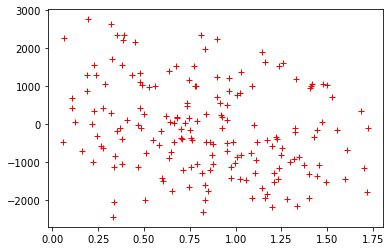

In [59]:
plt.plot(trimmed_radius,trimmed_velocity,'+',color='red',)